In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from imblearn.over_sampling import SMOTE

In [ ]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score, plot_confusion_matrix, make_scorer
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('customer-churn.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [5]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [6]:
df.churn.value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

For this data, predicitng that a customer will stay when are likely to churn seems to be the most costly outcome. For this reason, I will use recall as my modelling metric. 

In [7]:
df.columns.tolist()

['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [8]:
df.apply(lambda x: sum(x.isnull()))

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

need to check correlation matrix

<AxesSubplot:>

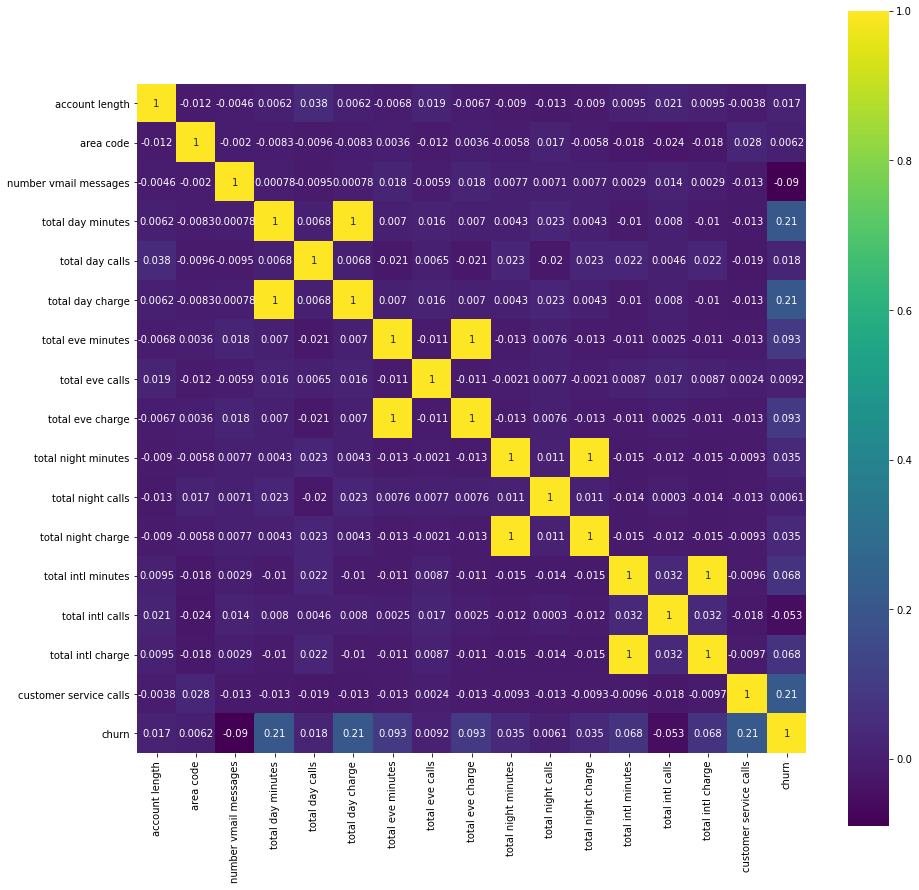

In [9]:
correlation = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')

In [10]:
correlation

account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl cha

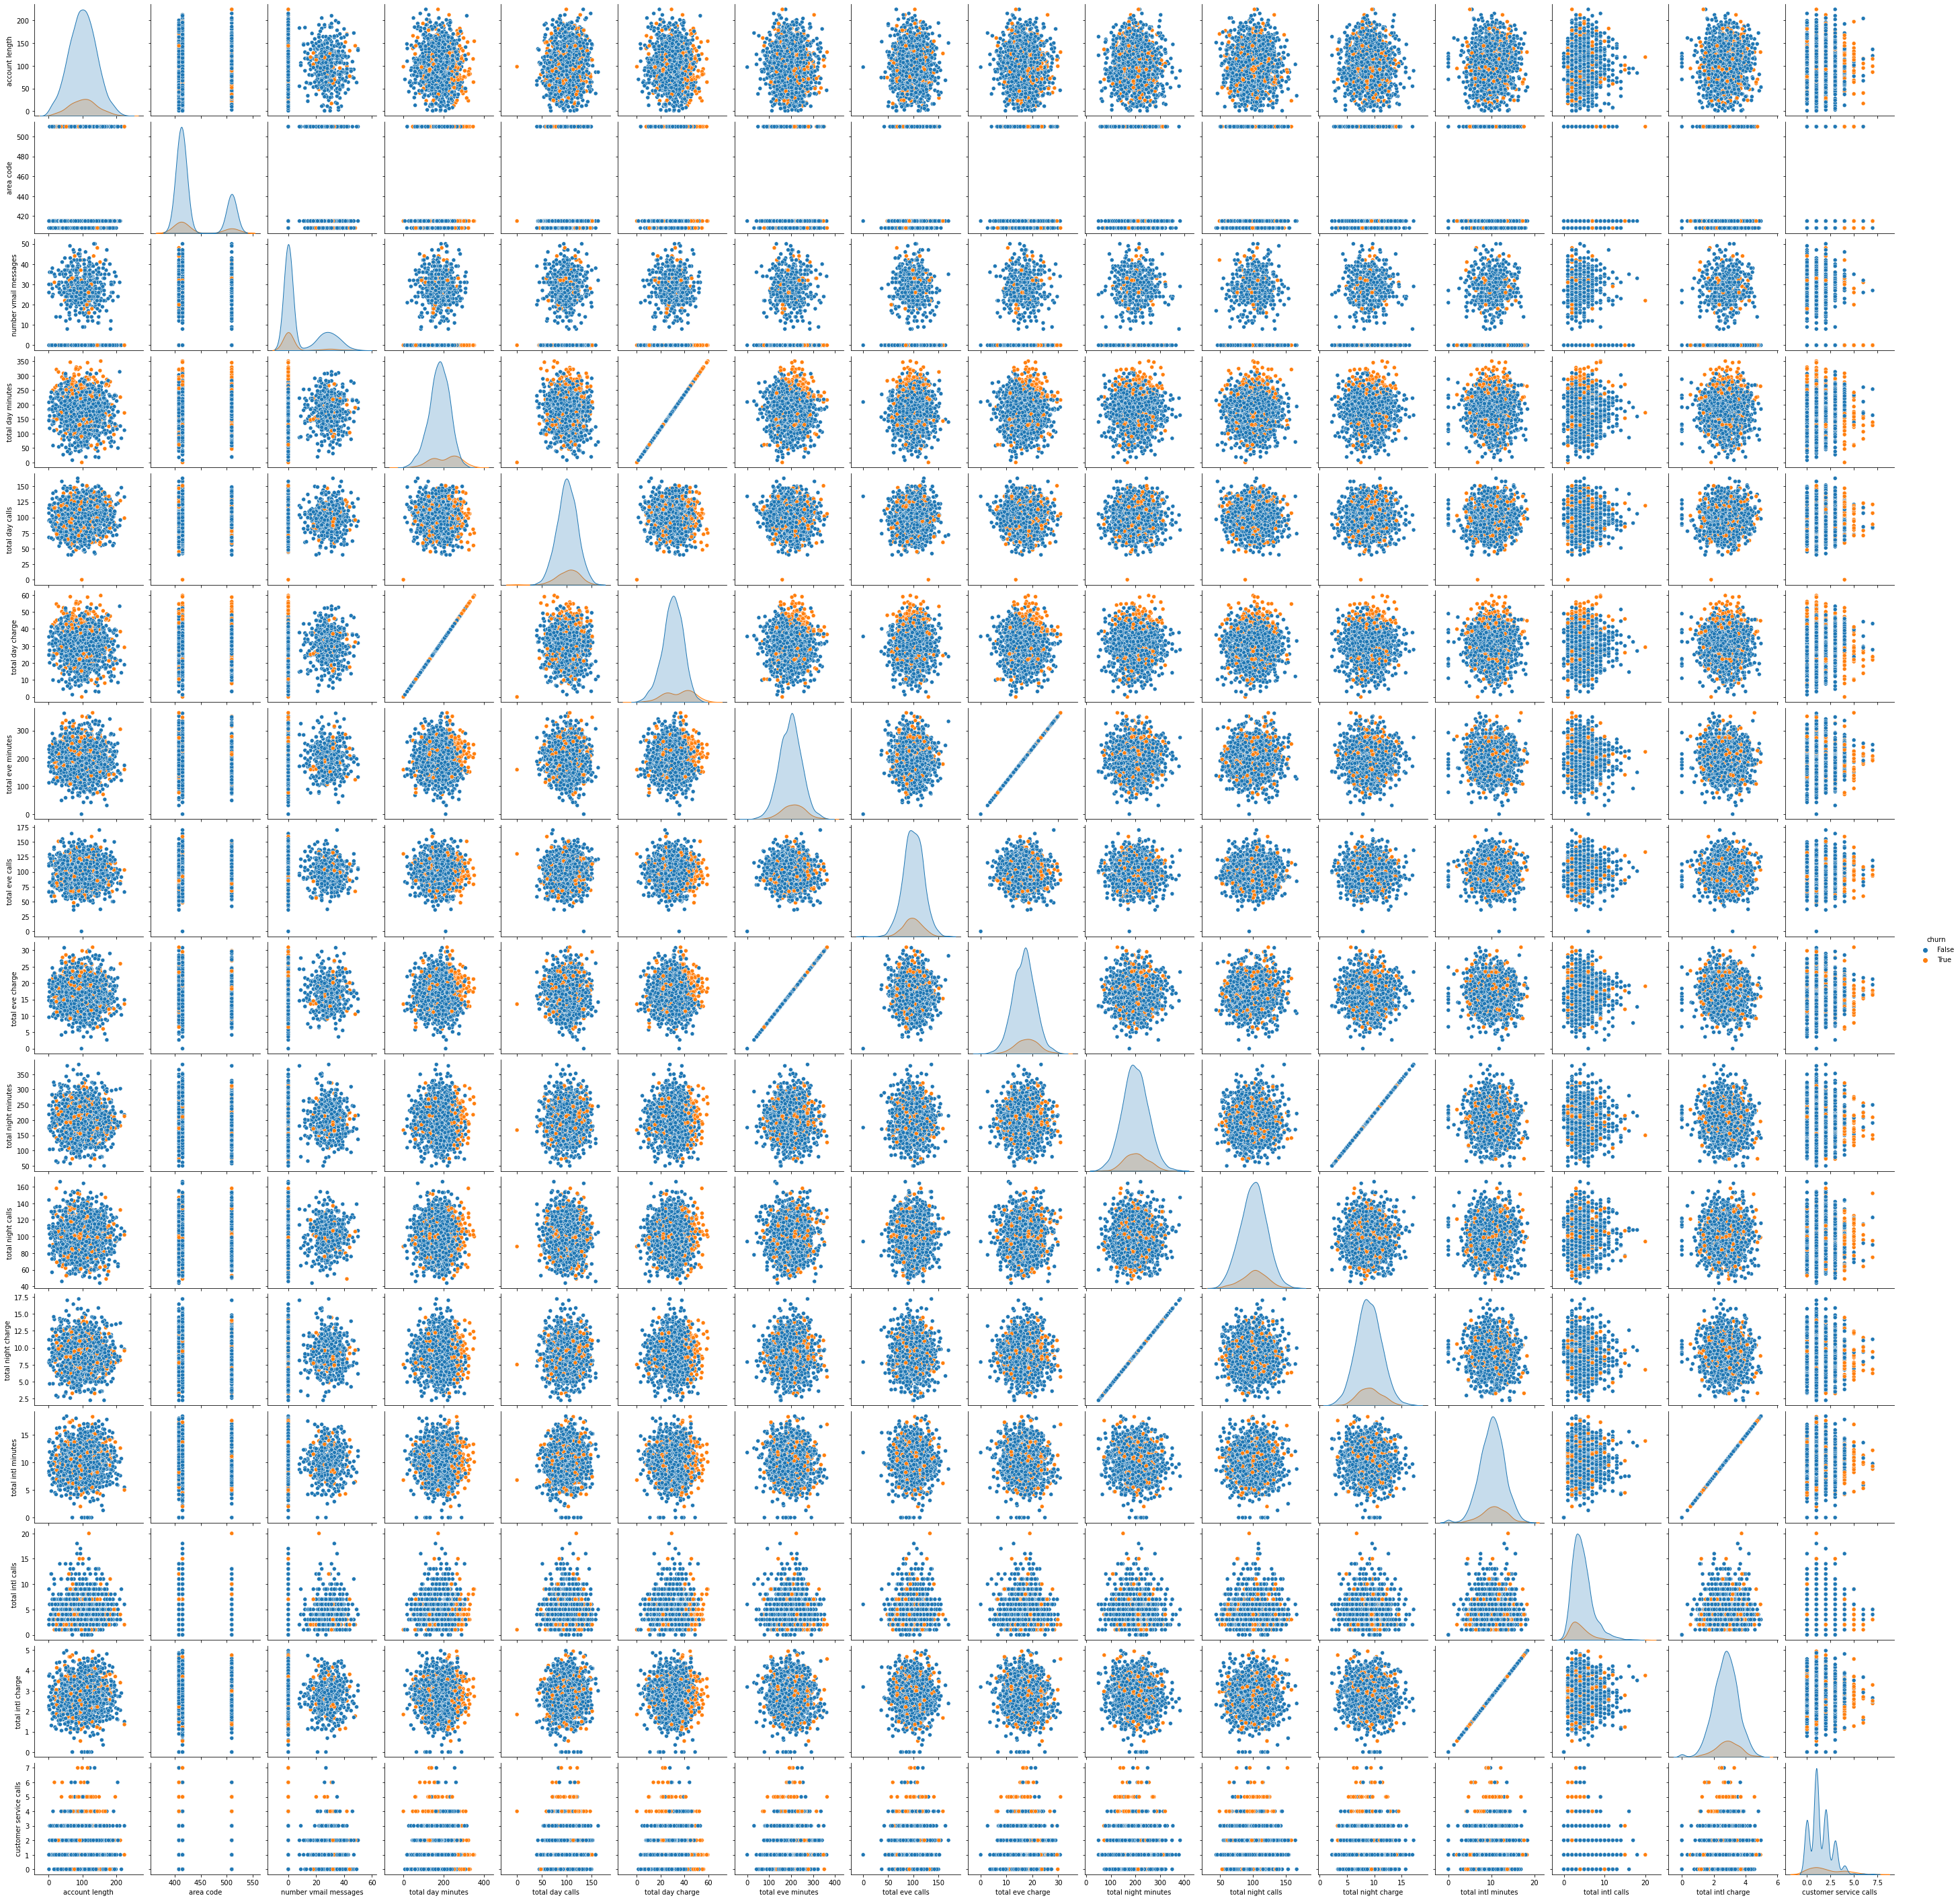

In [11]:
samp = df.sample(frac=0.5)
sns.pairplot(samp, hue='churn')

test recall, precision, f1 score
*recall* - minimizes false negatives(predict customer will stay when they are actually going to churn)
precision - false positives(predict they are going to leave when they are not)


In [12]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [13]:
df['area code'] = df['area code'].astype(str)

In [14]:
df.head()

state  account length area code phone number international plan  \
0    KS             128       415     382-4657                 no   
1    OH             107       415     371-7191                 no   
2    NJ             137       415     358-1921                 no   
3    OH              84       408     375-9999                yes   
4    OK              75       415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [15]:
x_numeric = df.select_dtypes('number')

In [16]:
y = df.churn.astype(int)

In [17]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(x_numeric, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, random_state=42)

In [18]:
first_model_reg = LogisticRegression(random_state=42)

In [19]:
cross_val_score(first_model_reg, X_train_all, y_train_all, scoring = 'recall')

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

array([0.02816901, 0.08333333, 0.02777778, 0.01388889, 0.08450704])

In [20]:
first_model_reg.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

0.046875


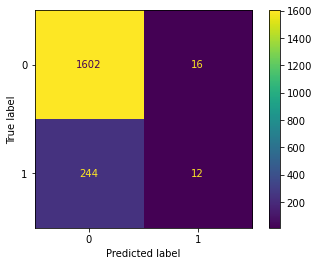

In [21]:
train_preds = first_model_reg.predict(X_train)
plot_confusion_matrix(first_model_reg, X_train, y_train)
score = recall_score(y_train, train_preds)
print(score)

0.00980392156862745


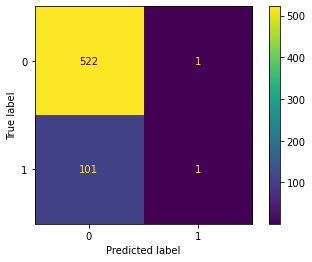

In [22]:
val_preds = first_model_reg.predict(X_val)
plot_confusion_matrix(first_model_reg, X_val, y_val)
score = recall_score(y_val, val_preds)
print(score)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [24]:
second_model_reg = LogisticRegression(random_state=42)
second_model_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

0.09375


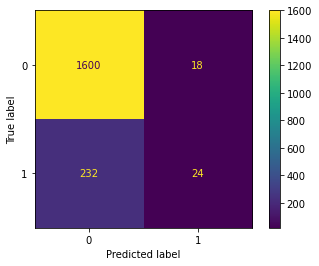

In [25]:
train_preds_scaled = second_model_reg.predict(X_train_scaled)
plot_confusion_matrix(second_model_reg, X_train_scaled, y_train)
score = recall_score(y_train, train_preds_scaled)
print(score)

## Fixing Class Imbalance

In [26]:
resampler = SMOTE(random_state = 42)
X_resampled, y_resampled = resampler.fit_resample(X_train_scaled, y_train)

In [27]:
third_model_reg = LogisticRegression(random_state=42, penalty = 'l1', solver = 'liblinear', C = .01)
third_model_reg.fit(X_resampled, y_resampled)

LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')

0.7855377008652658


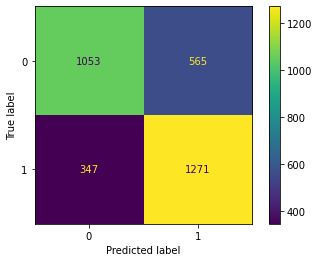

In [28]:
train_preds_resampled = third_model_reg.predict(X_resampled)
plot_confusion_matrix(third_model_reg, X_resampled, y_resampled)
score = recall_score(y_resampled, train_preds_resampled)
print(score)

1.0


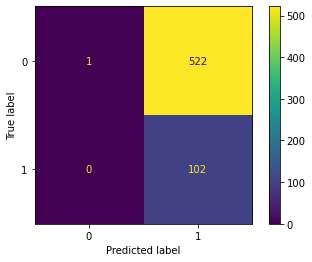

In [29]:
val_preds_resampled = third_model_reg.predict(X_val)
plot_confusion_matrix(third_model_reg, X_val, y_val)
score = recall_score(y_val, val_preds_resampled)
print(score)